# Testing document for pyGSLModel

### Testing model download and pruning functions

Standard HUMAN-GEM model downlaod test

In [ ]:
# Downloading standard Human-GEM model
from pyGSLModel import download_model

model_1 = download_model()

print(f"Number of Reactions in model : {len(model_1.reactions)}")
print(f"Number of Metabolites in model : {len(model_1.metabolites)}")
print(f"Number of Genes in model : {len(model_1.genes)}")

Converting gene symbols, model pruning, and removing transport reactions test

In [ ]:
# Converting gene names, pruning the model and removing GSl transport reactions
from pyGSLModel import convert_genes, prune_model, remove_GSL_transport

model_2 = convert_genes(model_1)
model_2 = prune_model(model_2)
model_2 = remove_GSL_transport(model_2)

print(f"Number of Reactions in model : {len(model_2.reactions)}")
print(f"Number of Metabolites in model : {len(model_2.metabolites)}")
print(f"Number of Genes in model : {len(model_2.genes)}")

print(f"Checking gene symbol conversion :")
model_2.genes.get_by_id("UGT8")

Testing download of pre-pruned model

In [1]:
# Testing pre-pruned model download
from pyGSLModel import download_GSL_model

model_3 = download_GSL_model()

print(f"Number of Reactions in model : {len(model_3.reactions)}")
print(f"Number of Metabolites in model : {len(model_3.metabolites)}")
print(f"Number of Genes in model : {len(model_3.genes)}")

print(f"Checking gene symbol conversion :")
model_3.genes.get_by_id("UGT8")

Model succesfully downloaded and read in.
Number of Reactions in model : 2312
Number of Metabolites in model : 2015
Number of Genes in model : 2887
Checking gene symbol conversion :


Gene identifier,UGT8
Name,G_UGT8
Memory address,0x260448edd50
Functional,True
In 2 reaction(s),"MAR00919, MAR00920"


### Testing performing simulations and analysing results

Performing a generic FBA simulation

In [ ]:
from pyGSLModel import run_metabolic_model, tabulate_model_results, plot_model_results

# Running Basic simulation
sol_1 = run_metabolic_model(model_3, method="FBA",objective_choice="D14_Neuron")

# Preparing dataframe
results_1 = tabulate_model_results(model_3,sol_1)
print(results_1.head())

# Generating plot
fig_1 = plot_model_results(results_1)
fig_1

Performing a knockout simulation

In [ ]:
from pyGSLModel import run_metabolic_model, tabulate_model_results, plot_model_results

# Running Basic simulation
sol_2 = run_metabolic_model(model_3, method="FBA",objective_choice="AC",knockout="B4GALNT1")

# Preparing dataframe
results_2 = tabulate_model_results(model_3,sol_2)
print(results_2.head())

# Generating plot
fig_2 = plot_model_results(results_2)
fig_2

Performing mFBA simulation

In [ ]:
from pyGSLModel import run_metabolic_model, tabulate_model_results, plot_model_results

# Running Basic simulation
sol_3 = run_metabolic_model(model_3, method="mFBA",objective_choice="D14_Neuron")

# Preparing dataframe
results_3 = tabulate_model_results(model_3,sol_3)
print(results_3.head())

# Generating plot
fig_3 = plot_model_results(results_3)
fig_3

Testing network visualisation. This saves a .html file

In [ ]:
from pyGSLModel import visualise_flux_network

visualise_flux_network(model_3,sol_3,file_path="./flux_network_test.html",height="1080px",width="100%")


### Transcriptomic integration testing

Testing standard iMAT integration

In [ ]:
import pandas as pd
# Making a dummy dataframe
d = {
    "Gene" : ["B4GALNT1", "ST3GAL5", "ST8SIA1","A4GALT"],
    "Sample_1" : [8,6,4,2]
}

# Converting the dictionary to a pandas dataframe and setting the index to Gene
iMAT_df_1 = pd.DataFrame(d)
iMAT_df_1 = iMAT_df_1.set_index("Gene").copy()

from pyGSLModel import iMAT_integrate, tabulate_model_results
sol_4 = iMAT_integrate(model_3,iMAT_df_1)

results_4 = tabulate_model_results(model_3, sol_4)
results_4.head()

Testing multi sample iMat integration with a dummy dataframe

In [ ]:
import pandas as pd
# Making a dummy dataframe
d = {
    "Gene" : ["B4GALNT1", "ST3GAL5", "ST8SIA1","A4GALT"],
    "Sample_1" : [8,6,4,2],
    "Sample_2" : [2,4,6,8],
    "Sample_3" : [6,2,8,4],
    "Sample_4" : [4,8,2,6]
}

# Converting the dictionary to a pandas dataframe and setting the index to Gene
iMAT_df_1 = pd.DataFrame(d)
iMAT_df_1 = iMAT_df_1.set_index("Gene").copy()

# Performing the iMAT integration for the custom data
from pyGSLModel import iMAT_multi_integrate
iMAT_res_1 = iMAT_multi_integrate(model_3, iMAT_df_1)

iMAT_res_1

Testing average TCGA integration with iMAT

In [ ]:
from pyGSLModel import TCGA_iMAT_integrate

# Lets adjust upper and lower quantiles here to select the top and bottom 15% of genes instead. We're going to leave epsilon and threshold alone
iMAT_TCGA_1, sol_dict = TCGA_iMAT_integrate(model_3, epsilon=10,threshold=0.1)

iMAT_TCGA_1.head()

Testing Integration with example

In [2]:
import pandas as pd
df_GBM_LGG = pd.read_csv("C:/Users/ottoc/OneDrive - University of Cambridge/PhD Year 3/GSL_Metabolism_Project/Python_Package/Brain_Vis/df_GBM_LGG.csv")
df_GBM_LGG = df_GBM_LGG.set_index("Gene").copy()
df_GBM_LGG.head()

from pyGSLModel import iMAT_multi_integrate

GBM_LGG_res_df, GBM_LGG_sol = iMAT_multi_integrate(model_3,df_GBM_LGG,upper_quantile=0.5,lower_quantile=0.5,epsilon=40,threshold=20)

Simulations Performed:1/3
Simulations Performed:2/3
Simulations Performed:3/3


In [3]:
from pyGSLModel import tabulate_model_results
GBM_dat = tabulate_model_results(model_3,GBM_LGG_sol["GBM_sol"])
GBM_dat["status"] = "GBM"
LGG_1_dat = tabulate_model_results(model_3,GBM_LGG_sol["LGG <1Yr Survival_sol"])
LGG_1_dat["status"] = "LGG <1Yr Survival"
LGG_2_dat = tabulate_model_results(model_3,GBM_LGG_sol["LGG >1 Yr Survival_sol"])
LGG_2_dat["status"] = "LGG >1 Yr Survival"

import pandas as pd
brain_df = pd.concat([GBM_dat,LGG_1_dat,LGG_2_dat],axis=0)

[Text(0.5, 0, '')]

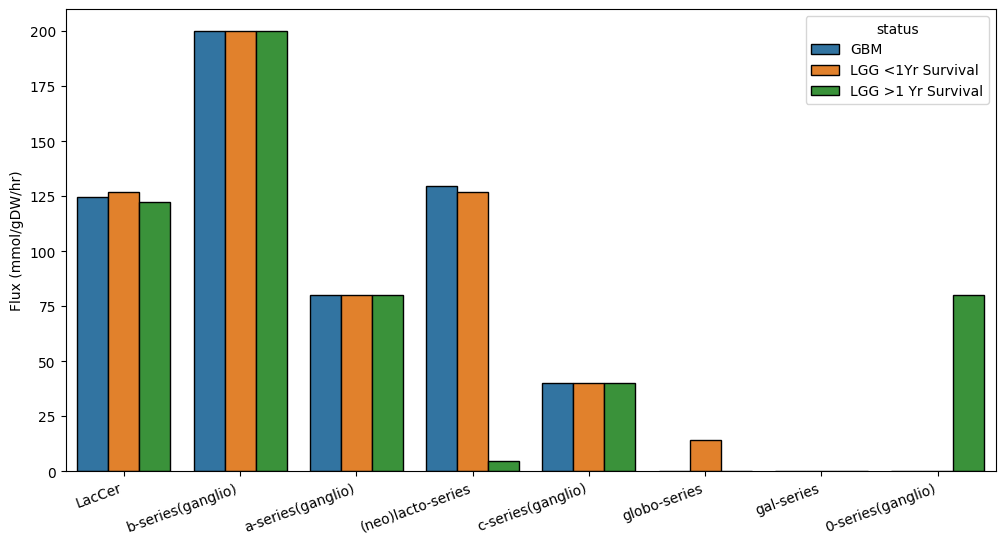

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(brain_df,x="Lipid Series",y="Flux (mmol/gDW/hr)",hue="status",edgecolor="black",estimator=sum,errorbar=None)
plt.xticks(rotation = 20,ha="right")
ax.set(xlabel=None)

In [5]:
from pyGSLModel import visualise_flux_network
visualise_flux_network(model_3,GBM_LGG_sol["GBM_sol"],file_path="C:/Users/ottoc/OneDrive - University of Cambridge/PhD Year 3/GSL_Metabolism_Project/Python_Package/Brain_Vis/GBM_network.html",height="1080px",width="100%",rxn_col="#1f77b4",met_col="#abdcff")
visualise_flux_network(model_3,GBM_LGG_sol["LGG <1Yr Survival_sol"],file_path="C:/Users/ottoc/OneDrive - University of Cambridge/PhD Year 3/GSL_Metabolism_Project/Python_Package/Brain_Vis/LGG_network_ls.html",height="1080px",width="100%",rxn_col="#ff7f0e",met_col="#ffca9c")
visualise_flux_network(model_3,GBM_LGG_sol["LGG >1 Yr Survival_sol"],file_path="C:/Users/ottoc/OneDrive - University of Cambridge/PhD Year 3/GSL_Metabolism_Project/Python_Package/Brain_Vis/LGG_network_gs.html",height="1080px",width="100%",rxn_col="#2ca02c",met_col="#99ed99")

html file wrtten to: C:/Users/ottoc/OneDrive - University of Cambridge/PhD Year 3/GSL_Metabolism_Project/Python_Package/Brain_Vis/GBM_network.html
html file wrtten to: C:/Users/ottoc/OneDrive - University of Cambridge/PhD Year 3/GSL_Metabolism_Project/Python_Package/Brain_Vis/LGG_network_ls.html
html file wrtten to: C:/Users/ottoc/OneDrive - University of Cambridge/PhD Year 3/GSL_Metabolism_Project/Python_Package/Brain_Vis/LGG_network_gs.html


Bile Duct example

In [ ]:
import pandas as pd
df_bd = pd.read_csv("C:/Users/ottoc/OneDrive - University of Cambridge/PhD Year 3/GSL_Metabolism_Project/Python_Package/Cholangiocarcinoma_Vis/BD_C.csv")
df_bd = df_bd.set_index("Gene").copy()
df_bd.head()

from pyGSLModel import iMAT_multi_integrate

bd_res_df, bd_sol = iMAT_multi_integrate(model_3,df_bd,upper_quantile=0.5,lower_quantile=0.5,epsilon=40,threshold=20)

In [ ]:
from pyGSLModel import tabulate_model_results
cholangio_dat = tabulate_model_results(model_3,bd_sol["Primary Tumor_sol"])
cholangio_dat["status"] = "Cholangiocarcinoma"
bd_dat = tabulate_model_results(model_3,bd_sol["Solid Tissue Normal_sol"])
bd_dat["status"] = "Bile Duct Normal Adjacent Tissue"


import pandas as pd
bdc_df = pd.concat([cholangio_dat,bd_dat],axis=0)
bdc_df.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(bdc_df,x="Lipid Series",y="Flux (mmol/gDW/hr)",hue="status",edgecolor="black",estimator=sum,errorbar=None)
plt.xticks(rotation = 20,ha="right")
ax.set(xlabel=None)

Testing sample wise iMAT integration of TCGA data

In [ ]:
from pyGSLModel import TCGA_iMAT_sample_integrate

# Selecting Bile duct for tissue argument as this has fewer samples (Brain has something like 2000 so takes a while). Leaving other arguments as default
iMAT_TCGA_sample = TCGA_iMAT_sample_integrate(model_3, tissue="Bile duct")

iMAT_TCGA_sample.head()